# Viaggio in ascensore

## Esperimento sul moto 1D ed analisi dati

Il movimento di un ascensore è un esempio di moto 1D. Obiettivo di questo esempio è quello di studiare la posizione, la velocità e l'accelerazione in funzione del tempo.

<div id = "immagine">

<img src = "Immagini/Ascensore_01.png" alt = "Immagine">

</div>

### Descrizione

La posizione dell'ascensore lungo la direzione verticale può essere registrata tramite una App per smartphone ([**phyphox**](https://phyphox.org/)).
L'applicazione misura la pressione atmosferica e calcola le variazioni di quota rispetto alla posizione iniziale, utilizzando un opportuno algoritmo.

1. Si effettua un esperimento, registrando i valori di quota in funzione del tempo.

2. I dati vengono memorizzati in un file di testo (*Tab separated values*) che ha la seguente struttura:

| Tempo (s)     | Pressione (hPa) | Altezza (m)    | Xxxxxx | Xxxxxx |
| :------------ | :-------------- | :------------- | :----- | :----- |
| 1.002612265E0 | 1.013205700E3   | 0.000000000E0  | XXXXXX | XXXXXX |
| 2.003274159E0 | 1.013197046E3   | 7.205260740E-2 | XXXXXX | XXXXXX |

3. A noi interessa leggere i dati della prima colonna e della terza colonna, per ottenere una **tabella oraria** del moto che vogliamo studiare, cioè un insieme di dati organizzati nel modo seguente:

| Tempo (s)     | Altezza (m)    |
| :------------ | :------------- |
| 1.002612265E0 | 0.000000000E0  |
| 2.003274159E0 | 7.205260740E-2 |

4. Si vuole ottenere innanzitutto una rappresentazione grafica dei dati, basandoci sul modulo [MatPlotLib](https://matplotlib.org/) di Python.

5. Si vogliono analizzare i dati per ottenere i valori della velocità in funzione del tempo.

6. Si vuole rappresentare graficamente l'andamento della velocità in funzione del tempo.

7. Salvare i grafici e i risultati dell'analisi dati in un file.

8. Discutere i risultati.

9. Calcolare i valori dell'accelerazione in funzione del tempo e confrontarli con i valori di accelerazione misurati simultaneamente da un altro sensore (accelerometro) con la stessa App.

10. Valutare insieme i risultati ottenuti riportando in un'unica figura i grafici di altezza, velocità e accelerazione.

#### 1. Esperimento

Installare sullo smartphone l'applicazione [phyphox](https://phyphox.org/)) e tra i menù disponibili scegliere sotto la voce **Vita quotidiana** l'esperimento **Ascensore**. Tasto **play** per iniziare la misura.

<div id = "immagine">

<img src = "Immagini/Phyphox.png" alt = "Immagine">

</div>

N.B. Servirà un ascensore.

#### 2. Salvare i dati

Dal tasto con i tre puntini verticali in alto a destra dello schermo dello smartphone selezionare **Esporta dati** e scegliere il formato preferito dei dati: per questo esempio scegliamo **CSV(Tabulator, decimal point)**.
Una volta salvato il file dati si può trasferire dallo smartphone al computer, per i passi successivi dell'esperimento.

| Dati disponibili  |
| :---------------- |
| Trip01-Height.csv |
| Trip02-Height.csv |
| Trip03-Height.csv |

#### 3. 4. Leggere i dati e rappresentarli in un grafico

Per leggere i dati e rappresentarli in grafico utilizziamo le librerie [NumPy](https://numpy.org) e [Matplotlib](https://matplotlib.org) di Python. Il codice che utilizziamo è basato su esempi descritti in [1](https://physics.nyu.edu/pine/pymanual/html/pymanMaster.html), [2](http://stacks.iop.org/PhysED/55/033006/mmedia) e [3](https://github.com/POSS-UniMe/RCwithRPi).

Per la lettura del file di testo utilizziamo la funzione **np.loadtxt()** del modulo **NumPy** con l'opzione **skiprows**, che permette di saltare le prime $ n $ righe, e con l'opzione **usecols**, che permette di selezionare le colonne che vogliamo leggere (rif. [4](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html))

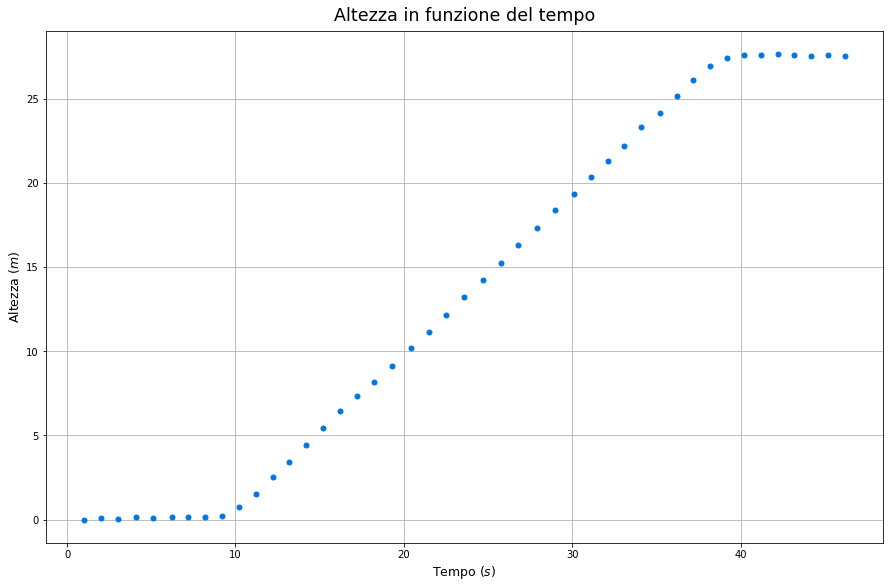

In [25]:
# Utilizzato per importare la libreria adoperata per le strutture e le funzioni matematiche.
import numpy as np
# Utilizzato per importare la libreria adoperata per i grafici.
import matplotlib.pyplot as plt


# Utilizzato per importare i dati da un file in una variabile.
inputDataFile = "Dati/Trip01-Height.csv"

# Utilizzato per leggere i dati dalla variabile.
t, x = np.loadtxt(inputDataFile, skiprows = 1, usecols = (0, 2), unpack = True)

# Utilizzato per il grafico.
plt.figure(1, figsize = (15, 15)) # Utilizzato per creare, numerare e dimensionare il grafico.
# Utilizzato per il titolo.
plt.title("Altezza in funzione del tempo", fontdict = {"fontsize": 17.5}, pad = 10)
# Utilizzato per la x.
plt.xlabel("Tempo $ (s) $", fontsize = 12.5)
# Utilizzato per la y.
plt.ylabel("Altezza $ (m) $", fontsize = 12.5)
# Utilizzato per rappresentare x e y.
plt.plot(t, x, "o", color = "#0075E2", markersize = 5)
# Utilizzato per la griglia.
plt.grid(True)
# Utilizzato per avere gli assi con la stessa scala.
plt.gca().set_aspect("equal", adjustable = "box")
# Utilizzato per mostrare il grafico.
plt.show()

#### 5. Calcolare la velocità

La velocità media in ciascun intervallo di tempo del tipo $ [t_1, t_2] $ viene calcolata in base alla semplice relazione:

<div id = "colorbox">

$$ v = \dfrac{\Delta x}{\Delta t} $$

</div>

Ed associamo questo valore $ v_1 $ al tempo $ t'_1 $ ottenuto come valore medio tra $ t_1 $ e $ t_2 $.

Per calcolare gli spostamenti $ \Delta x $ e la durata degli intervalli di tempo $ \Delta t $ tra due misure successive utilizziamo la funzione [**np.diff()**](https://numpy.org/doc/stable/reference/generated/numpy.diff.html) del modulo **NumPy**.

I valori calcolati vengono scritti sul file di testo **speedDataFile** formato da due colonne: la prima colonna contiene i valori del tempo, la seconda contiene i valori della velocità.

Per effettuare i calcoli e memorizzare i dati su file, aggiungiamo alcune righe di codice allo script precedente.

In [26]:
# Utilizzato per importare il file in una variabile.
speedDataFile = "Dati/Trip01-Speed.csv"

# Utilizzato per impostare il numero di cifre decimali nella stampa dei dati su file.
np.set_printoptions(precision = 20)
# Utilizzato per calcolare delta t.
delta_t = np.diff(t)
# Utilizzato per calcolare delta x.
delta_x = np.diff(x)
# Utilizzato per calcolare la velocità in m/s.
v = delta_x / delta_t
# Utilizzato per calcolare il valore medio del tempo in ogni intervallo di tempo.
t_prime = t[:-1] + (delta_t / 2)

# Utilizzato per salvare i dati in un file.
np.savetxt(speedDataFile, np.column_stack((t_prime, v)))

#### 6. Grafico della velocità in funzione del tempo

Per produrre un grafico della velocità in funzione del tempo utilizziamo la libreria **Matplotlib**.

Riportiamo nel grafico il nome del file in cui sono scritti i valori delle variabili tempo e velocità.

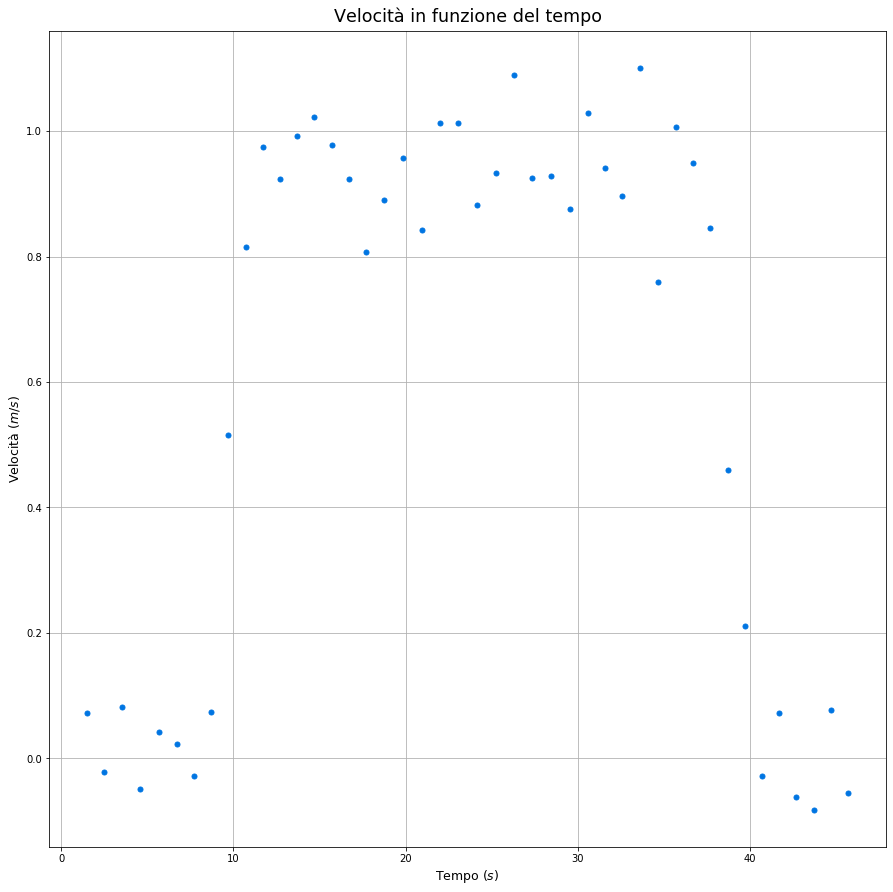

In [27]:
# Utilizzato per il grafico.
plt.figure(2, figsize = (15, 15)) # Utilizzato per creare, numerare e dimensionare il grafico.
# Utilizzato per il titolo.
plt.title("Velocità in funzione del tempo", fontdict = {"fontsize": 17.5}, pad = 10)
# Utilizzato per la x.
plt.xlabel("Tempo $ (s) $", fontsize = 12.5)
# Utilizzato per la y.
plt.ylabel("Velocità $ (m/s) $", fontsize = 12.5)
# Utilizzato per rappresentare x e y.
plt.plot(t_prime, v, "o", color = "#0075E2", markersize = 5)
# Utilizzato per la griglia.
plt.grid(True)
# Utilizzato per avere gli assi con la stessa scala.
#plt.gca().set_aspect("equal", adjustable = "box")
# Utilizzato per mostrare il grafico.
plt.show()

#### 7. Grafico cumulativo di altezza e velocità

Vogliamo riportare insieme i due grafici precedenti, a scopo di confronto.

Produciamo una figura in cui i due grafici sono distribuiti in due righe e una colonna, utilizzando la funzione **plt.subplot()** del modulo **Matplotlib** (v.rif. [5](https://matplotlib.org/3.3.1/gallery/subplots_axes_and_figures/subplot.html), [6](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html))

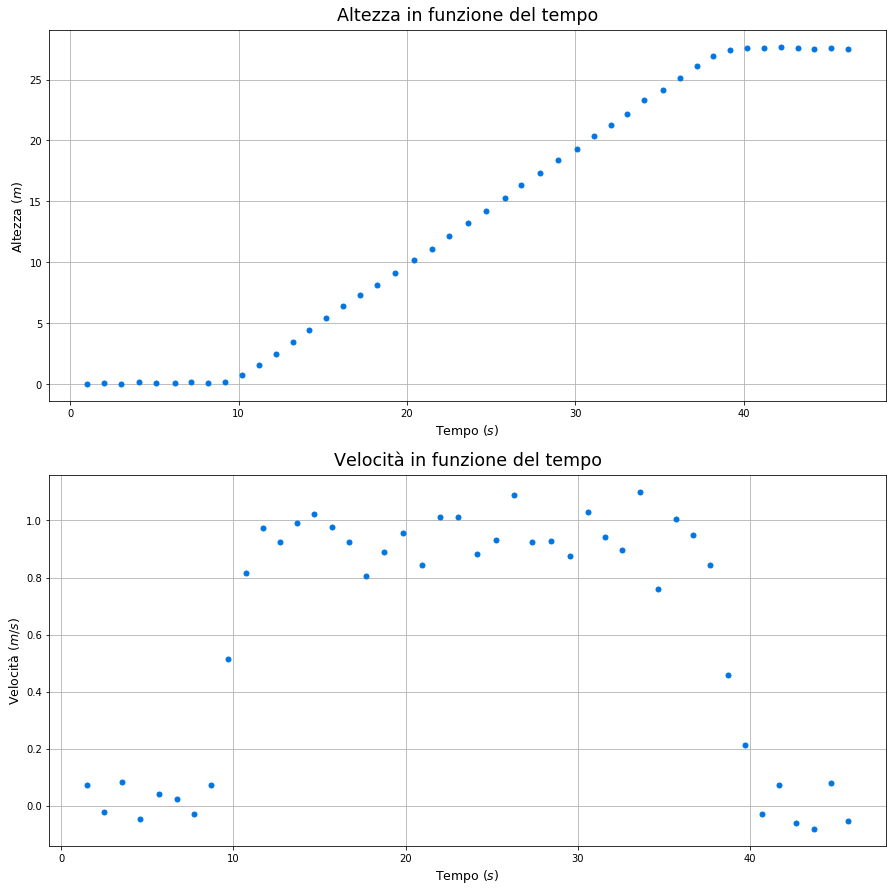

In [28]:
# Utilizzato per il grafico.
fig = plt.figure(figsize = (15, 15)) # Utilizzato per creare e dimensionare il grafico.

# Grafico 1.
plt.subplot(2, 1, 1)
# Utilizzato per il titolo.
plt.title("Altezza in funzione del tempo", fontdict = {"fontsize": 17.5}, pad = 10)
# Utilizzato per la x.
plt.xlabel("Tempo $ (s) $", fontsize = 12.5)
# Utilizzato per la y.
plt.ylabel("Altezza $ (m) $", fontsize = 12.5)
# Utilizzato per rappresentare x e y.
plt.plot(t, x, "o", color = "#0075E2", markersize = 5)
# Utilizzato per avere gli assi con la stessa scala.
#plt.gca().set_aspect("equal", adjustable = "box")
# Utilizzato per la griglia.
plt.grid(True)

# Grafico 2.
plt.subplot(2, 1, 2)
# Utilizzato per il titolo.
plt.title("Velocità in funzione del tempo", fontdict = {"fontsize": 17.5}, pad = 10)
# Utilizzato per la x.
plt.xlabel("Tempo $ (s) $", fontsize = 12.5)
# Utilizzato per la y.
plt.ylabel("Velocità $ (m/s) $", fontsize = 12.5)
# Utilizzato per rappresentare x e y.
plt.plot(t_prime, v, "o", color = "#0075E2", markersize = 5)
# Utilizzato per avere gli assi con la stessa scala.
#plt.gca().set_aspect("equal", adjustable = "box")
# Utilizzato per la griglia.
plt.grid(True)

#### 8. Analisi dei dati

##### 8.1 Inserire un marker nel grafico

Vogliamo inserire nel grafico alcuni **marker** che ci permettano di individuare un certo intervallo di tempo. Stiamo supponendo che i dati siano già ordinati secondo i tempi in ordine crescente.

Il numero di coppie (tempo $ t $, altezza $ h $) è dato dalla dimensione dell'array che può essere calcolata tramite la funzione **np.size()** della libreria **NumPy**.

In [29]:
# Utilizzato per calcolare la dimensione dell'array.
np.size(t)

45

Si vuole scegliere un sottoinsieme dei dati, per tempi compresi tra quello corrispondente al **primo marker** e quello corrispondente al **secondo marker**.

I valori dei due marker vengono scelti utilizzando gli **slider** e vengono rappresentati anche nei grafici tramite rette verticali colorate.

Valori consigliati: 10, 35
Primo marker = 10 - Secondo marker = 35
Primo tempo = 11.20230152 s - Secondo tempo = 37.19930147 s


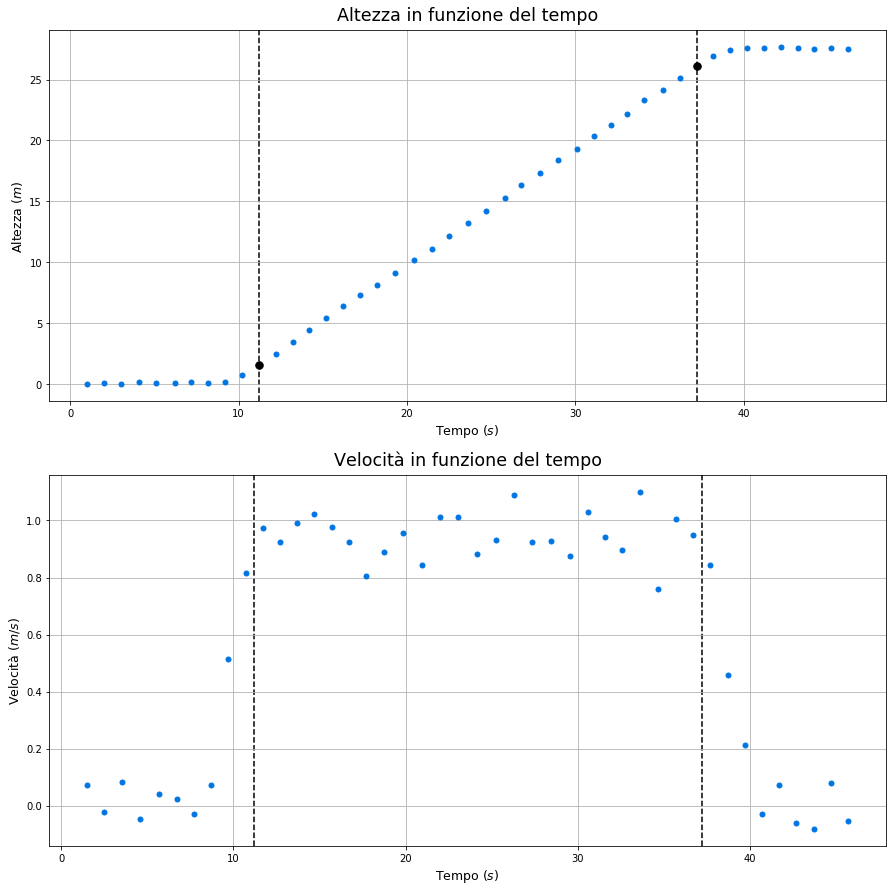

<function __main__.funzione(MarkerOne, MarkerTwo)>

In [30]:
# Utilizzato per importare la libreria adoperata per i widget.
import ipywidgets as widgets


# Utilizzato per creare un widget (IntSlider) adoperato per cambiare interattivamente il valore del primo marker.
sliderMarkerOne = widgets.IntSlider(min = 0, max = (np.size(t) - 1), step = 1, value = 10, continuous_update = False)
# Utilizzato per creare un widget (IntSlider) adoperato per cambiare interattivamente il valore del secondo marker.
sliderMarkerTwo = widgets.IntSlider(min = 0, max = (np.size(t) - 1), step = 1, value = 35, continuous_update = False)

# Funzione.
def funzione(MarkerOne, MarkerTwo):
    print("Valori consigliati: 10, 35") # Utilizzato per stampare.
    print("Primo marker =", MarkerOne, "-", "Secondo marker =", MarkerTwo) # Utilizzato per stampare.
    MarkerOneTime = t[MarkerOne] # Utilizzato per il primo marker.
    MarkerTwoTime = t[MarkerTwo] # Utilizzato per il secondo marker.
    # Utilizzato per stampare.
    print("Primo tempo =", MarkerOneTime, "s", "-", "Secondo tempo =", MarkerTwoTime, "s")
    makeplots(MarkerOne, MarkerTwo) # Utilizzato per adoperare la funzione grafico.
    # Utilizzato per avere il sottoinsieme dei valori del tempo compresi tra i due marker.
    t_subset = t[MarkerOne:MarkerTwo]
    # Utilizzato per avere il sottoinsieme dei valori dello spazio compresi tra i due marker.
    x_subset = x[MarkerOne:MarkerTwo]

# Funzione grafico.
def makeplots(MarkerOne, MarkerTwo):
    # Utilizzato per creare e dimensionare il grafico.
    fig = plt.figure(figsize = (15, 15))

    # Grafico 1.
    plt.subplot(2, 1, 1)
    # Utilizzato per il titolo.
    plt.title("Altezza in funzione del tempo", fontdict = {"fontsize": 17.5}, pad = 10)
    # Utilizzato per la x.
    plt.xlabel("Tempo $ (s) $", fontsize = 12.5)
    # Utilizzato per la y.
    plt.ylabel("Altezza $ (m) $", fontsize = 12.5)
    # Utilizzato per rappresentare x e y.
    plt.plot(t, x, "o", color = "#0075E2", markersize = 5)
    # Utilizzato per il primo marker.
    plt.plot(t[MarkerOne], x[MarkerOne], "o", color = "black", markersize = 7.5)
    # Utilizzato per il secondo marker.
    plt.plot(t[MarkerTwo], x[MarkerTwo], "o", color = "black", markersize = 7.5)
    # Utilizzato per disegnare il primo marker.
    plt.axvline(color = "black", x = t[MarkerOne], linewidth = 1.5, linestyle = "--", zorder = -1)
    # Utilizzato per disegnare il secondo marker.
    plt.axvline(color = "black", x = t[MarkerTwo], linewidth = 1.5, linestyle = "--", zorder = -1)
    # Utilizzato per avere gli assi con la stessa scala.
    #plt.gca().set_aspect("equal", adjustable = "box")
    # Utilizzato per la griglia.
    plt.grid(True)

    # Grafico 2.
    plt.subplot(2, 1, 2)
    # Utilizzato per il titolo.
    plt.title("Velocità in funzione del tempo", fontdict = {"fontsize": 17.5}, pad = 10)
    # Utilizzato per la x.
    plt.xlabel("Tempo $ (s) $", fontsize = 12.5)
    # Utilizzato per la y.
    plt.ylabel("Velocità $ (m/s) $", fontsize = 12.5)
    # Utilizzato per rappresentare x e y.
    plt.plot(t_prime, v, "o", color = "#0075E2", markersize = 5)
    # Utilizzato per disegnare il primo marker.
    plt.axvline(color = "black", x = t[MarkerOne], linewidth = 1.5, linestyle = "--", zorder = -1)
    # Utilizzato per disegnare il secondo marker.
    plt.axvline(color = "black", x = t[MarkerTwo], linewidth = 1.5, linestyle = "--", zorder = -1)
    # Utilizzato per avere gli assi con la stessa scala.
    #plt.gca().set_aspect("equal", adjustable = "box")
    # Utilizzato per la griglia.
    plt.grid(True)

# Utilizzato per collegare i widget alla funzione e per interagire con gli slider.
widgets.interact(funzione, MarkerOne = sliderMarkerOne, MarkerTwo = sliderMarkerTwo)

##### 8.2 Fit lineare dei dati di x(t) in un intervallo di tempo scelto

**Ipotesi**: moto uniforme.

Se in un certo intervallo di tempo il moto è uniforme, comunque scelti due istanti di tempo, $ t_1 $ e $ t_2 $ in tale intervallo, il rapporto $ (x_2 - x_1) / (t_2 - t_1) $ è costante ed uguale a $ v $. Se fissiamo $ t_1 $ per un istante $ t $ generico, dovrà essere:

<div id = "colorbox">

$$ \dfrac{x - x_1}{t - t_1} = v $$

</div>

Da cui segue:

<div id = "colorbox">

$$ x - x_1 = v \cdot (t - t_1) \hspace{0.25 cm} \text{e quindi} \hspace{0.25 cm} x = (v \cdot t) + [x_1 - (v \cdot t_1)] $$

</div>

In altri termini, in un intervallo di tempo in cui il moto è uniforme, il grafico di $ x $ in funzione del tempo $ t $ è lineare, ed è descritto da un'equazione del tipo:

<div id = "colorbox">

$$ x = A t + B $$

</div>

I valori dei parametri $ A $ e $ B $, che corrispondono alla retta che meglio approssima i dati sperimentali, si ottengono tramite un metodo che minimizza la somma dei quadrati degli scarti tra i valori teorici ed i valori sperimentali misurati. \[[7](https://nbviewer.jupyter.org/github/engineersCode/EngComp1_offtheground/blob/master/notebooks_en/5_Linear_Regression_with_Real_Data.ipynb), [8](https://physics.nyu.edu/pine/pymanual/html/chap7/chap7_funcs.html#example-linear-least-squares-fitting\)].

In [31]:
# Utilizzato per avere il sottoinsieme dei valori del tempo compresi tra i due marker.
t_subset = t[sliderMarkerOne.value:sliderMarkerTwo.value]
# Utilizzato per avere il sottoinsieme dei valori dello spazio compresi tra i due marker.
x_subset = x[sliderMarkerOne.value:sliderMarkerTwo.value]

# Funzione fit lineare.
def LineFit(x, y):
    x_avg = x.mean()
    slope = (y * (x - x_avg)).sum() / (x * (x - x_avg)).sum()
    y_intercept = y.mean() - slope * x_avg
    return slope, y_intercept

# Utilizzato per calcolare i valori della velocità e dello spazio con la funzione LineFit e per inserirli in due variabili.
v_est, x_intercept = LineFit(t_subset, x_subset)

print("Valore stimato dell'accelerazione (dal fit lineare): \nv = {0:0.3} m/s".format(v_est))

Valore stimato dell'accelerazione (dal fit lineare): 
v = 0.942 m/s


#### 8.3 Confronto grafico tra i dati sperimentali ed il fit lineare

Costruiamo un grafico in cui oltre ai dati sperimentali è riportato anche l'andamento previsto in un certo intervallo di tempo in caso di moto con velocità costante, utilizzando i valori dei parametri calcolati tramite la procedura di **best-fit** della sezione precedente.

Definiamo alcuni particolari del grafico utilizzando le funzioni:

[plt.plot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html),
[linestyle](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle),
[plt.axvline()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axvline.html),
[plt.legend()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html).

Infine memorizziamo il grafico in un file utilizzando la funzione:

[plt.savefig()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html) della libreria **Matplotlib**.

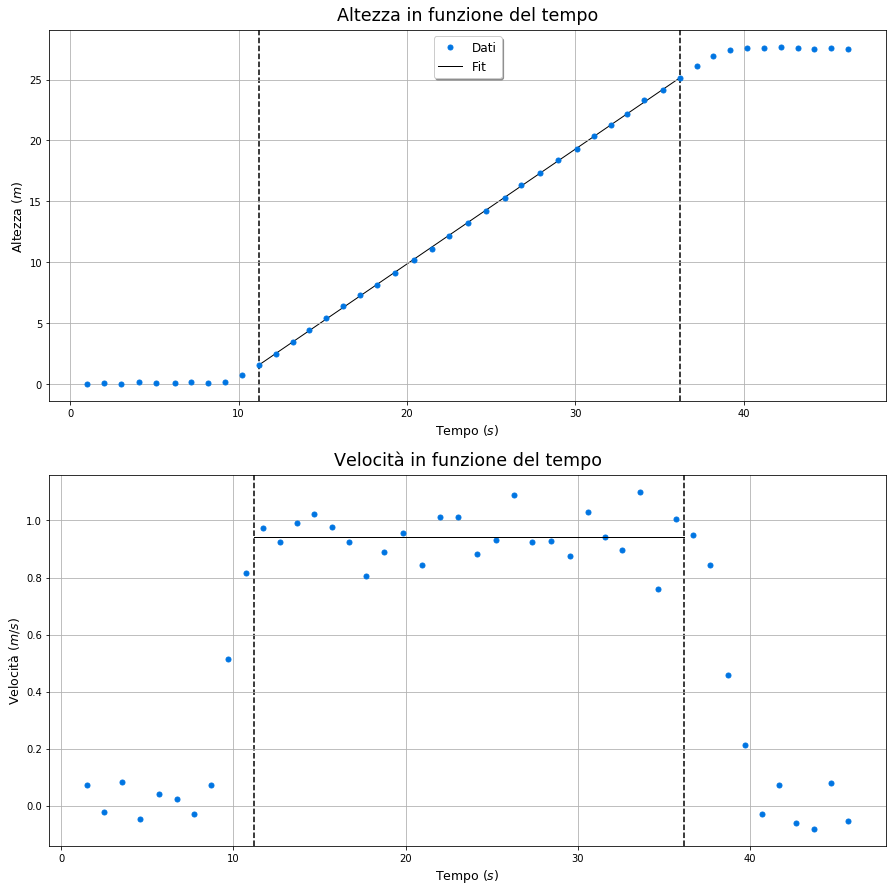

In [32]:
x_fit = v_est * t_subset + x_intercept # Altezza fit lineare in m.
v_fit = x_fit / x_fit * v_est # Velocità fit lineare in m/s.

# Utilizzato per il grafico.
fig = plt.figure(figsize = (15, 15)) # Utilizzato per creare e dimensionare il grafico.

# Grafico 1.
plt.subplot(2, 1, 1)
# Utilizzato per il titolo.
plt.title("Altezza in funzione del tempo", fontdict = {"fontsize": 17.5}, pad = 10)
# Utilizzato per la x.
plt.xlabel("Tempo $ (s) $", fontsize = 12.5)
# Utilizzato per la y.
plt.ylabel("Altezza $ (m) $", fontsize = 12.5)
# Utilizzato per rappresentare x e y.
plt.plot(t, x, "o", color = "#0075E2", markersize = 5, label = "Dati")
# Utilizzato per rappresentare x e y.
plt.plot(t_subset, x_fit, "-", color = "black", linewidth = 1, zorder = -1, label = "Fit")
# Utilizzato per disegnare il primo marker.
plt.axvline(color = "black", x = t_subset[0], linewidth = 1.5, linestyle = "--", zorder = -1)
# Utilizzato per disegnare il secondo marker.
plt.axvline(color = "black", x = t_subset[-1], linewidth = 1.5, linestyle = "--", zorder = -1)
# Utilizzato per la legenda.
plt.legend(loc = "upper center", shadow = True, fontsize = "large")
# Utilizzato per avere gli assi con la stessa scala.
#plt.gca().set_aspect("equal", adjustable = "box")
# Utilizzato per la griglia.
plt.grid(True)

# Grafico 2.
plt.subplot(2, 1, 2)
# Utilizzato per il titolo.
plt.title("Velocità in funzione del tempo", fontdict = {"fontsize": 17.5}, pad = 10)
# Utilizzato per la x.
plt.xlabel("Tempo $ (s) $", fontsize = 12.5)
# Utilizzato per la y.
plt.ylabel("Velocità $ (m/s) $", fontsize = 12.5)
# Utilizzato per rappresentare x e y.
plt.plot(t_prime, v, "o", color = "#0075E2", markersize = 5)
# Utilizzato per rappresentare x e y.
plt.plot(t_subset, v_fit, "-", color = "black", linewidth = 1)
# Utilizzato per disegnare il primo marker.
plt.axvline(color = "black", x = t_subset[0], linewidth = 1.5, linestyle = "--", zorder = -1)
# Utilizzato per disegnare il secondo marker.
plt.axvline(color = "black", x = t_subset[-1], linewidth = 1.5, linestyle = "--", zorder = -1)
# Utilizzato per avere gli assi con la stessa scala.
#plt.gca().set_aspect("equal", adjustable = "box")
# Utilizzato per la griglia.
plt.grid(True)

# Utilizzato per salvare i dati in un file.
plt.savefig("Dati/height+speed.pdf")

#### 9. Calcolo dell'accelerazione e confronto con i valori misurati

##### 9.1 Calcolo

La situazione è analoga a quella che riguarda il calcolo della velocità media nei vari intervalli di tempo. L'accelerazione media in ciascun intervallo di tempo del tipo $ [t'_1, t'_2] $ viene calcolata in base alla semplice relazione:

<div id = "colorbox">

$$ a = \dfrac{\Delta v}{\Delta t} $$

</div>

Ed associamo questo valore $ a_1 $ al tempo $ t"_1 $ ottenuto come valore medio tra $ t'_1 $ e $ t'_2 $.

Per calcolare le variazioni di velocità, cioè per calcolare $ \Delta v $ e la durata degli intervalli di tempo $ \Delta t' $ tra due dati successivi, utilizziamo la funzione **np.diff()**.

I dati calcolati vengono scritti in un file di testo il cui nome è associato alla variabile **accelerationDataFile**. Il testo è strutturato in due colonne, la prima contenente i valori del tempo, la seconda contenente i valori dell'accelerazione. Scegliamo il nome del file in modo da evidenziare che si tratta di **valori calcolati** di accelerazione.

In [33]:
# Utilizzato per importare il file in una variabile.
accelerationDataFile = "Dati/Trip01-Acceleration.csv"

# Utilizzato per impostare il numero di cifre decimali nella stampa dei dati su file.
np.set_printoptions(precision = 20)
# Utilizzato per calcolare delta t'.
delta_t_prime = np.diff(t_prime)
# Utilizzato per calcolare delta v.
delta_v = np.diff(v)
# Utilizzato per calcolare l'accelerazione in m/s^2.
a = delta_v / delta_t_prime
# Utilizzato per calcolare il valore medio del tempo in ogni intervallo di tempo.
t_double_prime = t_prime[:-1] + (delta_t_prime / 2)

# Utilizzato per salvare i dati in un file.
np.savetxt(accelerationDataFile, np.column_stack((t_double_prime, a)))

#### 9.2 Grafico

Vogliamo visualizzare l'andamento grafico dell'accelerazione $ a $ in funzione del tempo. Inoltre vogliamo effettuare il confronto con i **valori** dell'accelerazione **misurati** con un accelerometro. Si tratta di valori misurati mediante un sensore dello smartphone con la stessa App **phyphox** e memorizzati in un file di testo (*Tab separated values*) che ha la seguente struttura:

| Tempo (s)                | Accelerazione ($ m/s^2 $) |
| :----------------------- | :------------------------ |
| 2.003207003250000007e+00 | -9.390230845239912194e-02 |

Il nome del file di testo contenente i dati sperimentali è associato alla variabile **accelerometerDataFile**.

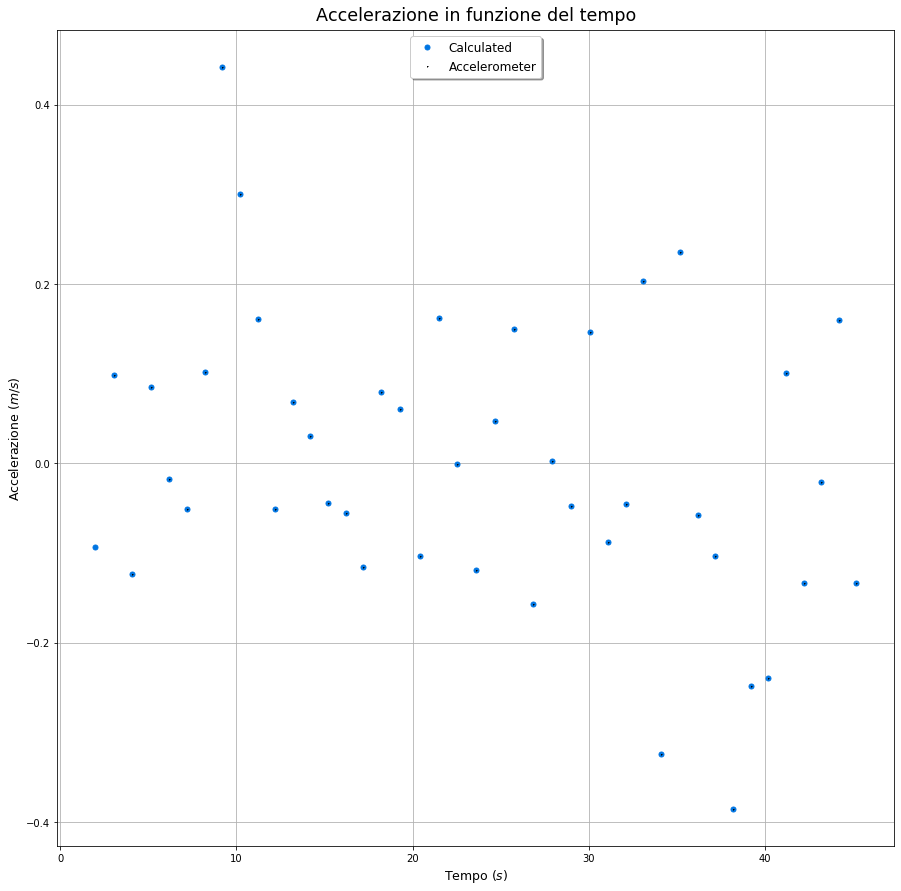

In [34]:
# Utilizzato per importare i dati da un file in una variabile.
accelerometerDataFile = "Dati/Trip01-Acceleration.csv"

# Utilizzato per leggere i dati dalla variabile.
t_exp, accel = np.loadtxt(accelerometerDataFile, skiprows = 1, unpack = True)

# Utilizzato per il grafico.
plt.figure(4, figsize = (15, 15)) # Utilizzato per creare, numerare e dimensionare il grafico.
# Utilizzato per il titolo.
plt.title("Accelerazione in funzione del tempo", fontdict = {"fontsize": 17.5}, pad = 10)
# Utilizzato per la x.
plt.xlabel("Tempo $ (s) $", fontsize = 12.5)
# Utilizzato per la y.
plt.ylabel("Accelerazione $ (m/s) $", fontsize = 12.5)
# Utilizzato per rappresentare x e y.
plt.plot(t_double_prime, a, "o", color = "#0075E2", markersize = 5, label = "Calculated")
plt.plot(t_exp, accel, "+", color = "black", markersize = 1, label = "Accelerometer")
# Utilizzato per la legenda.
plt.legend(loc = "upper center", shadow = True, fontsize = "large")
# Utilizzato per la griglia.
plt.grid(True)
# Utilizzato per avere gli assi con la stessa scala.
#plt.gca().set_aspect("equal", adjustable = "box")
# Utilizzato per mostrare il grafico.
plt.show()

### Suggerimento

I risultati ottenuti possono essere discussi efficacemente mettendo a confronto questo grafico con il grafico che mostra l'andamento della velocità in funzione del tempo.

#### 10. Confronto tra i grafici di altezza, velocità e accelerazione

Produciamo una figura in cui i tre grafici sono distribuiti in tre righe e una colonna, utilizzando la funzione **plt.subplot()**. La figura viene memorizzata in un file tramite la funzione **plt.savefig()** di **Matplotlib**.

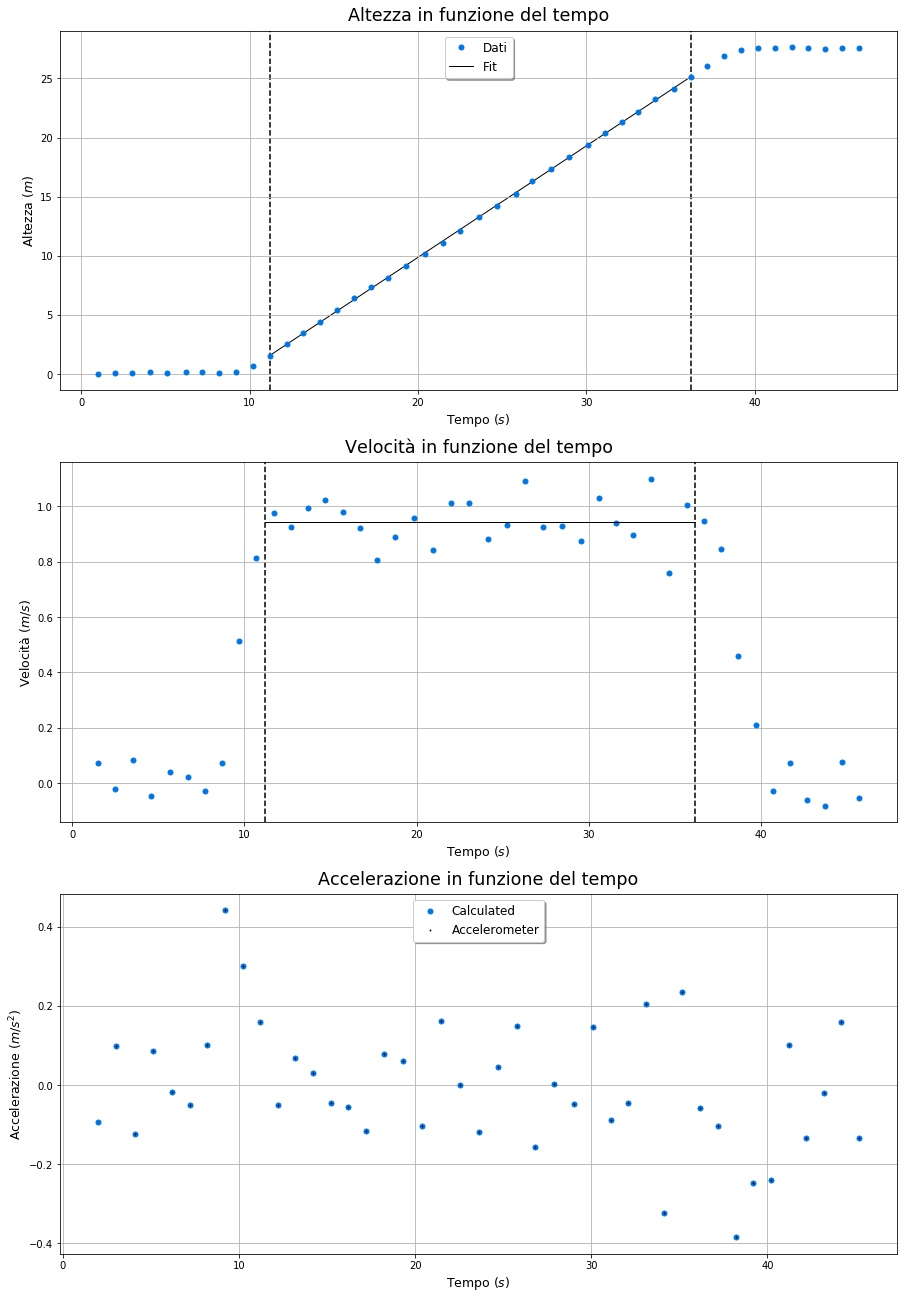

In [35]:
# Utilizzato per il grafico.
fig = plt.figure(figsize = (15, 22.5)) # Utilizzato per creare e dimensionare il grafico.

# Grafico 1.
plt.subplot(3, 1, 1)
# Utilizzato per il titolo.
plt.title("Altezza in funzione del tempo", fontdict = {"fontsize": 17.5}, pad = 10)
# Utilizzato per la x.
plt.xlabel("Tempo $ (s) $", fontsize = 12.5)
# Utilizzato per la y.
plt.ylabel("Altezza $ (m) $", fontsize = 12.5)
# Utilizzato per rappresentare x e y.
plt.plot(t, x, "o", color = "#0075E2", markersize = 5, label = "Dati")
# Utilizzato per rappresentare x e y.
plt.plot(t_subset, x_fit, "-", color = "black", linewidth = 1, zorder = -1, label = "Fit")
# Utilizzato per disegnare il primo marker.
plt.axvline(color = "black", x = t_subset[0], linewidth = 1.5, linestyle = "--", zorder = -1)
# Utilizzato per disegnare il secondo marker.
plt.axvline(color = "black", x = t_subset[-1], linewidth = 1.5, linestyle = "--", zorder = -1)
# Utilizzato per la legenda.
plt.legend(loc = "upper center", shadow = True, fontsize = "large")
# Utilizzato per avere gli assi con la stessa scala.
#plt.gca().set_aspect("equal", adjustable = "box")
# Utilizzato per la griglia.
plt.grid(True)

# Grafico 2.
plt.subplot(3, 1, 2)
# Utilizzato per il titolo.
plt.title("Velocità in funzione del tempo", fontdict = {"fontsize": 17.5}, pad = 10)
# Utilizzato per la x.
plt.xlabel("Tempo $ (s) $", fontsize = 12.5)
# Utilizzato per la y.
plt.ylabel("Velocità $ (m/s) $", fontsize = 12.5)
# Utilizzato per rappresentare x e y.
plt.plot(t_prime, v, "o", color = "#0075E2", markersize = 5)
# Utilizzato per rappresentare x e y.
plt.plot(t_subset, v_fit, "-", color = "black", linewidth = 1)
# Utilizzato per disegnare il primo marker.
plt.axvline(color = "black", x = t_subset[0], linewidth = 1.5, linestyle = "--", zorder = -1)
# Utilizzato per disegnare il secondo marker.
plt.axvline(color = "black", x = t_subset[-1], linewidth = 1.5, linestyle = "--", zorder = -1)
# Utilizzato per avere gli assi con la stessa scala.
#plt.gca().set_aspect("equal", adjustable = "box")
# Utilizzato per la griglia.
plt.grid(True)

# Grafico 3.
plt.subplot(3, 1, 3)
# Utilizzato per il titolo.
plt.title("Accelerazione in funzione del tempo", fontdict = {"fontsize": 17.5}, pad = 10)
# Utilizzato per la x.
plt.xlabel("Tempo $ (s) $", fontsize = 12.5)
# Utilizzato per la y.
plt.ylabel("Accelerazione $ (m/s^{2}) $", fontsize = 12.5)
# Utilizzato per rappresentare x e y.
plt.plot(t_double_prime, a, "o", color = "#0075E2", markersize = 5, label = "Calculated")
# Utilizzato per rappresentare x e y.
plt.plot(t_exp, accel, "d", color = "black", markersize = 1, label = "Accelerometer")
# Utilizzato per la legenda.
plt.legend(loc = "upper center", shadow = True, fontsize = "large")
# Utilizzato per avere gli assi con la stessa scala.
#plt.gca().set_aspect("equal", adjustable = "box")
# Utilizzato per la griglia.
plt.grid(True)

# Utilizzato per salvare i dati in un file.
plt.savefig("Dati/Trip01-Results.pdf")

# Utilizzato per mostrare il grafico.
plt.show()

Questa figura si può confrontare direttamente con la figura prodotta dall'applicazione **phyphox** e permette di verificare che l'analisi dei dati porti agli stessi risultati.

> Per eseguire il codice Python contenuto in questo **notebook** Jupyter, anche se Python e Notebook Jupyter non sono installati sulla macchina che stai adoperando, puoi utilizzare l'ambiente [**binder**](https://mybinder.org) online.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Darkaquon/Physics-with-Open-Source-Software/master?filepath=%2FNotebook%2FViaggio_in_ascensore.ipynb)

## What we have learned

*Python*

* Leggere i dati da un file di testo.

* Riportare i dati in un grafico.

* Salvare i dati calcolati in un file di testo.

* Produrre più grafici in una stessa figura.

* Selezionare un sottoinsieme di dati.

* Ottenere un fit lineare di un insieme di dati.

* Confrontare diversi set di dati in uno stesso grafico.

* Memorizzare i grafici in un file.

*Fisica*

* Acquisire i dati riguardanti un esperimento con strumentazione portatile (uno smartphone con l'app **phyphox**).

* Elaborare i dati che forniscono la posizione in funzione del tempo e calcolare la velocità e l'accelerazione.

* Studiare il moto considerando l'andamento grafico delle variabili che descrivono posizione, velocità e accelerazione.

## References and notes

#### Immagini

1. *Department MIFT with a panoramic lift. Augmented reality*. The "Andrea Donato" building at the University of Messina offers a nice view on the Strait of Messina. This will be the headquarters of the Mathematics, Data Science and Computer Science Center of the University.

#### Rappresentazione grafica dei dati

2. [Introduction to Python for Science](https://physics.nyu.edu/pine/pymanual/html/pymanMaster.html)

3. [Experiments and data analysis on one-dimensional motion with Raspberry Pi and Python](http://stacks.iop.org/PhysED/55/033006/mmedia)

4. [Circuits with Raspberry Pi and Python](https://github.com/POSS-UniMe/RCwithRPi)

5. [Reading data from a text file with **loadtxt**](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)

     * "This function aims to be a fast reader for simply formatted files. The **genfromtxt** function provides more sophisticated            handling of, e.g., lines with missing values."

6. [Including more plots in a figure](https://matplotlib.org/3.3.1/gallery/subplots_axes_and_figures/subplot.html)

7. [Multiple plots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) with Matplotlib.

#### Fit lineare dei dati

8. Lorena A. Barba, Natalia C. Clementi, *Linear regression with real data*, [Engineering Computation](https://nbviewer.jupyter.org/github/engineersCode/EngComp1_offtheground/blob/master/notebooks_en/5_Linear_Regression_with_Real_Data.ipynb), GitHub.

9. David J. Pine, *Linear least squares fitting*, [Introduction to Python for Science](https://physics.nyu.edu/pine/pymanual/html/chap7/chap7_funcs.html#example-linear-least-squares-fitting)

#### Funzioni della libreria *Matplotlib*

10. [plt.plot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)

11. [linestyle](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle)

12. [plt.axvline()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axvline.html)

13. [plt.legend()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html)

14. [plt.savefig()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html)

## Grafica notebook

In [36]:
# Utilizzato per importare la libreria adoperata per visualizzare l'HTML con il Python.
from IPython.core.display import HTML


css_file = "Notebook.css" # File CSS.

# Utilizzato per aprire e leggere il file CSS adoperato per modificare la visualizzazione del notebook.
HTML(open(css_file, "r").read())

## Copyright and License
-------------------------
(c) 2020 Andrea Mandanici, Marco Guarnera, Giuseppe Mandaglio, Giovanni Pirrotta. All content is under Creative Common Attribution <a rel = "license" href = "https://creativecommons.org/licenses/by/4.0"> CC BY 4.0 </a> and all code is under [BSD 3 - Clause License.](https://opensource.org/licenses/BSD-3-Clause)